# Day 1: Download & Plot Stock Prices

## Objective
Goal: Learn how to fetch stock data, visualize trends, and extract key observations that a portfolio manager or trader would care about.

## Steps
1. Basic Data Exploration
2. Summary Statistics
3. Trend Visualization
4. Daily Returns
5. Identify Key Periods

## Theory Recap

- Stock price data (OHLC, volume) forms the foundation of quant analysis.
- Moving averages help detect trends and market sentiment.
- Daily returns and volatility provide a first look into risk.
- Business relevance: These insights are used to time entries/exits or assess past performance.

In [33]:
# import necessary libraries
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [34]:

# Download historical data for Apple (AAPL) from july 26, 2024, to July 25, 2025
ticker = "AAPL"
start_date = "2023-07-26"
end_date = "2025-07-25"

data = yf.download(ticker, start_date, end_date)
print(data.head())

C:\Users\vedik\AppData\Local\Temp\ipykernel_4948\2339464176.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start_date, end_date)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2023-07-26  192.571915  193.700613  191.403619  191.750141  47471900
2023-07-27  191.304596  195.245138  190.641240  194.076842  47460200
2023-07-28  193.888733  194.680806  192.215484  192.740228  48291400
2023-07-31  194.502579  194.542191  193.324373  194.116445  38824100
2023-08-01  193.670929  194.779822  193.344198  194.294689  35175100


## step 1: Basic data exploaration

From the visual inspection of the graph, there are some insights and questions that can be formulated:

1. Since start of 2025, the stock has been on decline and in the last 3-4 has seen lot of volaitilty with second lowest point hit after 20+ months of the 24 months of the entire history of the data in april 2025 and which very close to the lowest point in april of 2024
2. the fall from highest point in december of 2024 with price of around 255 and the second lowest in april of 2025 of around 170 is around 30%
3. 

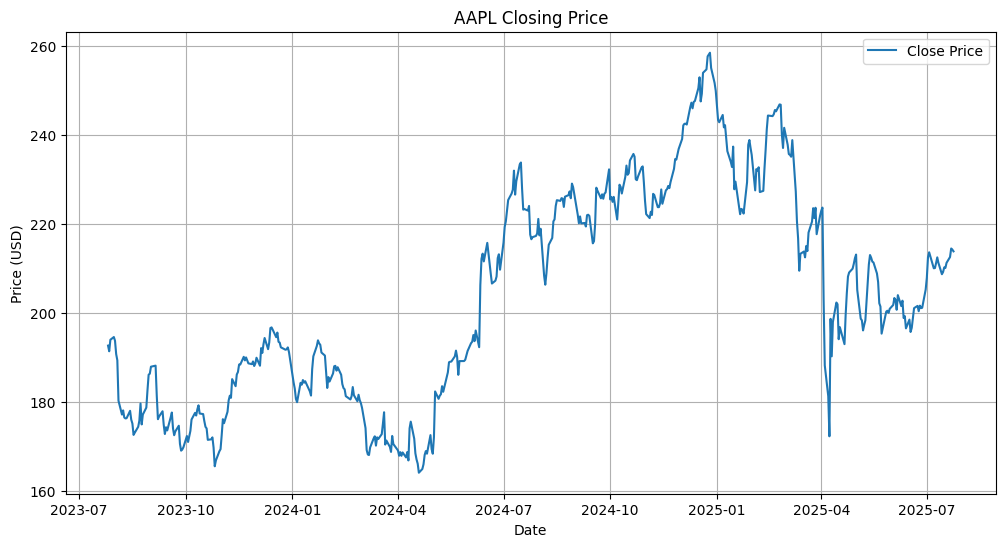

In [35]:

#create a plot with matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title(f'{ticker} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()




## Step 2: Data summary

In [36]:
print("Data Summary:")
print(data.describe())  # Descriptive statistics (mean, std, min, etc.)
print(f"Total trading days: {len(data)}")
print(f"Date Range: {data.index.min()} to {data.index.max()}")


Data Summary:
Price        Close        High         Low        Open        Volume
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL
count   501.000000  501.000000  501.000000  501.000000  5.010000e+02
mean    203.418175  205.304858  201.312295  203.209765  5.683516e+07
std      23.952537   24.132033   23.594535   23.880057  2.625936e+07
min     164.009476  165.401065  163.095000  164.357388  2.323470e+07
25%     182.279144  183.929178  180.250797  182.348723  4.302070e+07
50%     201.000000  203.243476  199.259995  201.350006  5.100590e+07
75%     223.962601  226.035461  222.223941  224.142099  6.177760e+07
max     258.396667  259.474086  257.010028  257.568678  3.186799e+08
Total trading days: 501
Date Range: 2023-07-26 00:00:00 to 2025-07-24 00:00:00


## adding 20 day moving average and 50 day moving average

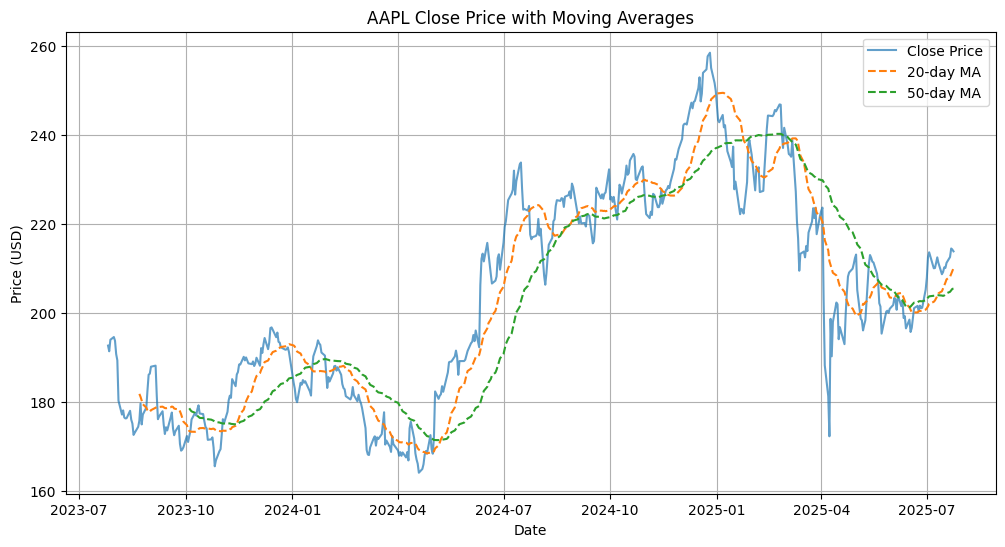

In [37]:
# Your code starts here
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', alpha=0.7)
plt.plot(data['MA20'], label='20-day MA', linestyle='--')
plt.plot(data['MA50'], label='50-day MA', linestyle='--')
plt.title(f'{ticker} Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


## Average daily returns for past one year



In [38]:
# Your code starts here
data['Daily_Return'] = data['Close'].pct_change()
print(f"Average Daily Return: {data['Daily_Return'].mean():.4%}")
print(f"Daily Return Volatility: {data['Daily_Return'].std():.4%}")


Average Daily Return: 0.0358%
Daily Return Volatility: 1.7360%


In [39]:
highest_price = data['Close'].idxmax()
lowest_price = data['Close'].idxmin()
print(f"Highest Price on {highest_price}: {data['Close'].max()}")
print(f"Lowest Price on {lowest_price}: {data['Close'].min()}")


Highest Price on Ticker
AAPL   2024-12-26
dtype: datetime64[ns]: Ticker
AAPL    258.396667
dtype: float64
Lowest Price on Ticker
AAPL   2024-04-19
dtype: datetime64[ns]: Ticker
AAPL    164.009476
dtype: float64
